# Rock-Paper-Scissor Against Bad Randomization

In [126]:
import sys 
sys.path.append("../src")
import numpy
import matplotlib.pyplot as plt
import LearningGames

## Create game

In [127]:
class RPS_vs_bad_rng:
    action_set={"R","P","S"}
    def __init__(self,action_sequence=["R","P","S"],length_measurement=1):
        """Create game

        Args:
            action_sequence: sequence of actions for player 2
        """
        self.action_sequence=action_sequence
        self.last_action=len(self.action_sequence)-1
        # create outputs with all combinations of actions
        measurement_set=self.action_set
        for i in range(length_measurement-1):
            new_measurement_set=set()
            for m in measurement_set:
                for a in self.action_set:
                    new_measurement_set.add(m+a)
            measurement_set=new_measurement_set
        print("Measurement set with {:d} elements".format(len(measurement_set)))
        if len(measurement_set)<28:
            print(measurement_set)
        self.measurement_set=measurement_set
        # initialize measurement
        self.measurement=length_measurement*"S"
    def cost(self,p1_action,p2_action) -> float:
        """Returns game outcome

        Args:
            p1_action: action for player 1
            p2_action: action for player 2

        Returns:
            game result (float): -1 if player 1 wins, +1 if player 1 loses, 0 draw
        """
        if p1_action==p2_action:
            # draw
            return 0
        if (p1_action=="R" and p2_action=="S") or (p1_action=="P" and p2_action=="R") or (p1_action=="S" and p2_action=="P"):
            return -1
        else:
            return +1                
    def get_measurement(self):
        """get measurement for next game

        Returns:
            measurement: measurement for next game
        """
        return self.measurement
    def play(self,p1_action) -> tuple[float,dict[str,float]]:      
        """Play game

        Args:
            p1_action: action for player 1

        Returns: 
            tuple[float,dict(str,float)]
            cost (float): -1 if player 1 wins, +1 if player 1 loses, 0 draw
            all_costs (dict[str,float]): dictionary with costs for all actions of player 1
        """
        # select action for player 2
        self.last_action += 1
        if self.last_action>=len(self.action_sequence):
            self.last_action=0
        p2_action=self.action_sequence[self.last_action]
        # update measurement
        self.measurement=self.measurement[1:]+p2_action
        # cost for given action of player 1
        cost=self.cost(p1_action,p2_action)
        # costs for all actions of player 1
        all_costs={a:self.cost(a,p2_action) for a in self.action_set}
        return (cost,all_costs)
    

## Create LearningGame object

+ Against a static player, we can use `gamma=0`
+ Against a deterministic player, the temperature can be quite low. This will result in very fast learning.

In [128]:
action_sequence=numpy.random.permutation(["R","P","S"]*50)
print("action sequence :",action_sequence)
game=RPS_vs_bad_rng(action_sequence=action_sequence,length_measurement=5)
lg=LearningGames.LearningGame(game.action_set,measurement_set=game.measurement_set,
                              gamma=0.0,inverse_temperature=.1,seed=0);

action sequence : ['S' 'S' 'P' 'P' 'P' 'P' 'P' 'R' 'P' 'P' 'P' 'P' 'S' 'S' 'S' 'P' 'S' 'S'
 'P' 'R' 'S' 'R' 'S' 'P' 'R' 'P' 'P' 'P' 'R' 'P' 'P' 'S' 'S' 'R' 'S' 'S'
 'S' 'S' 'R' 'P' 'R' 'R' 'R' 'P' 'S' 'S' 'R' 'P' 'S' 'P' 'R' 'R' 'S' 'P'
 'P' 'P' 'P' 'S' 'S' 'P' 'P' 'S' 'R' 'S' 'S' 'R' 'R' 'P' 'P' 'P' 'R' 'R'
 'R' 'S' 'R' 'P' 'S' 'R' 'P' 'S' 'S' 'S' 'S' 'S' 'P' 'R' 'P' 'R' 'S' 'S'
 'P' 'R' 'R' 'R' 'S' 'P' 'S' 'P' 'S' 'R' 'R' 'S' 'R' 'S' 'S' 'R' 'P' 'R'
 'S' 'R' 'R' 'S' 'S' 'P' 'R' 'S' 'R' 'S' 'S' 'P' 'P' 'R' 'R' 'S' 'R' 'S'
 'R' 'P' 'R' 'R' 'R' 'P' 'P' 'R' 'R' 'R' 'P' 'P' 'R' 'S' 'P' 'S' 'P' 'R'
 'P' 'R' 'R' 'P' 'R' 'S']
Measurement set with 243 elements


## Simulate game

In [129]:
lg.reset()
M = 30000
costs=numpy.zeros(M)
for iter in range(M):
    # Play
    measurement=game.get_measurement()
    action=lg.get_action(measurement)
    (costs[iter],all_costs)=game.play(action)
    # Learn
    lg.update_energies(measurement, all_costs)
    # output
    if iter<10:
        print("iter={:4d}, measurement = {:s}, action = {:s}, cost = {:2.0f}, all_costs = {:s}".format(iter,measurement,action,costs[iter],str(all_costs)))
    #print(lg.energy)
lg.get_regret(display=True);

iter=   0, measurement = SSSSS, action = R, cost = -1, all_costs = {'S': 0, 'R': -1, 'P': 1}
iter=   1, measurement = SSSSS, action = S, cost =  0, all_costs = {'S': 0, 'R': -1, 'P': 1}
iter=   2, measurement = SSSSS, action = S, cost = -1, all_costs = {'S': -1, 'R': 1, 'P': 0}
iter=   3, measurement = SSSSP, action = S, cost = -1, all_costs = {'S': -1, 'R': 1, 'P': 0}
iter=   4, measurement = SSSPP, action = P, cost =  0, all_costs = {'S': -1, 'R': 1, 'P': 0}
iter=   5, measurement = SSPPP, action = P, cost =  0, all_costs = {'S': -1, 'R': 1, 'P': 0}
iter=   6, measurement = SPPPP, action = R, cost =  1, all_costs = {'S': -1, 'R': 1, 'P': 0}
iter=   7, measurement = PPPPP, action = P, cost = -1, all_costs = {'S': 1, 'R': 0, 'P': -1}
iter=   8, measurement = PPPPR, action = R, cost =  1, all_costs = {'S': -1, 'R': 1, 'P': 0}
iter=   9, measurement = PPPRP, action = P, cost =  0, all_costs = {'S': -1, 'R': 1, 'P': 0}
  number_updates =         30000  alpha1       =      0.998697  alpha0

## Plot results

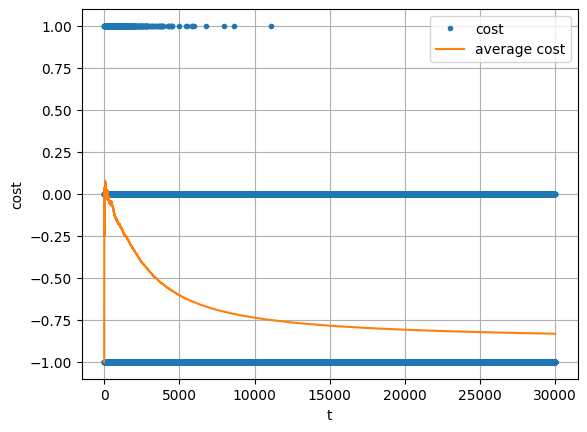

In [130]:
fig=plt.figure()
plt.plot(range(M),costs,'.',label='cost')
plt.plot(range(M),numpy.divide(numpy.cumsum(costs),numpy.add(range(M),1)),'-',label='average cost')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('cost');